# Vision models for image interpretation
Some models support image input and can interpret the images. This might be useful to guide the large language model it further decsions about what to do with the image.

In [1]:
from bia_bob import bob
bob.__version__

'0.7.0'

First, we load an example image.

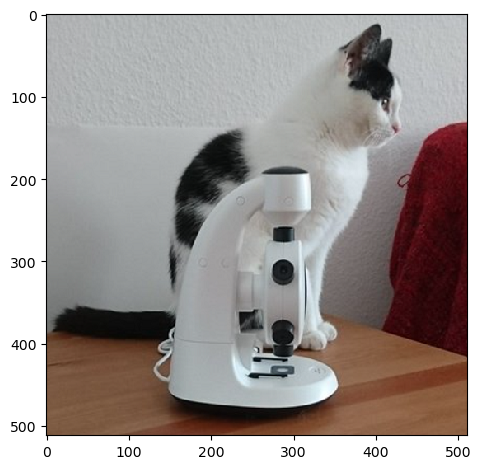

In [2]:
from skimage.io import imread, imshow
image = imread("real_cat.png")

imshow(image)

## gemini-pro-vision
The gemini-pro-vision model allows interpreting images.

In [3]:
bob.initialize(model='gemini-pro-vision')

In [4]:
%%bob image
what's in this image? Answer in one short sentence.

 A cat is sitting next to a microscope.

## gpt-4-vision-preview
Thegpt-4-vision-preview model can do so too.

In [5]:
bob.initialize(model="gpt-4-vision-preview")

In [6]:
%%bob image
what's in this image? Answer in one short sentence.

The image shows a black and white cat sitting next to a white medical device, possibly an automated peritoneal dialysis machine.